# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [92]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
boston=pd.read_csv(r"C:\Users\Vithushan\Downloads\boston_data.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [94]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [95]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [96]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [97]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

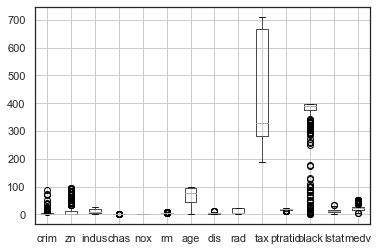

In [98]:
boxplot = boston.boxplot(column=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'])

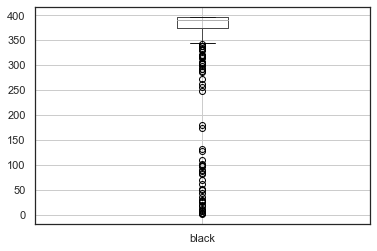

In [99]:
boxplot = boston.boxplot(column=['black'])

In [100]:
boston.drop(boston.loc[boston["black"]<150].index,inplace=True)

In [101]:
stats = boston.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
outliers = pd.DataFrame(columns=boston.columns)
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 6
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = boston[(boston[col] < lower) |
                   (boston[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers.head()


C:\Users\Vithushan\AppData\Local\Temp\ipykernel_8832\3477490255.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Vithushan\AppData\Local\Temp\ipykernel_8832\3477490255.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Vithushan\AppData\Local\Temp\ipykernel_8832\3477490255.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Vithushan\AppData\Local\Temp\ipykernel_8832\3477490255.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Vithushan\AppData\Local

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Outlier
17,15.0234,0.0,18.1,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,crim
34,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0,crim
50,23.6482,0.0,18.1,0.0,0.671,6.38,96.2,1.3861,24.0,666.0,20.2,396.9,23.69,13.1,crim
60,17.8667,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2,crim
114,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,crim


In [102]:
z=outliers.drop("Outlier", axis=1)

In [118]:
z.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
17,15.0234,0.0,18.1,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
34,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0
50,23.6482,0.0,18.1,0.0,0.671,6.38,96.2,1.3861,24.0,666.0,20.2,396.9,23.69,13.1
60,17.8667,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
114,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [104]:
boston.drop(z.index, inplace=True)

In [105]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [119]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.263346,0.563533,NaN,0.650208,-0.177332,0.452847,-0.454300,0.891695,0.806902,0.323464,-0.265308,0.449646,-0.340498
zn,-0.263346,1.000000,-0.502819,NaN,-0.489742,0.306471,-0.511277,0.647613,-0.252615,-0.216292,-0.360783,0.138405,-0.399561,0.314361
indus,0.563533,-0.502819,1.000000,NaN,0.717323,-0.374262,0.569427,-0.639498,0.531312,0.663762,0.332683,-0.340957,0.586541,-0.446630
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,0.650208,-0.489742,0.717323,NaN,1.000000,-0.254328,0.720494,-0.749412,0.579668,0.616033,0.149106,-0.300318,0.547390,-0.322068
rm,-0.177332,0.306471,-0.374262,NaN,-0.254328,1.000000,-0.180853,0.140052,-0.149015,-0.241208,-0.376169,0.213474,-0.604495,0.773455
age,0.452847,-0.511277,0.569427,NaN,0.720494,-0.180853,1.000000,-0.692437,0.369410,0.413193,0.183139,-0.229924,0.577162,-0.320424
dis,-0.454300,0.647613,-0.639498,NaN,-0.749412,0.140052,-0.692437,1.000000,-0.389076,-0.415437,-0.148965,0.221426,-0.431931,0.141467
rad,0.891695,-0.252615,0.531312,NaN,0.579668,-0.149015,0.369410,-0.389076,1.000000,0.869590,0.378141,-0.221470,0.359740,-0.278082
tax,0.806902,-0.216292,0.663762,NaN,0.616033,-0.241208,0.413193,-0.415437,0.869590,1.000000,0.371844,-0.289741,0.441078,-0.394292


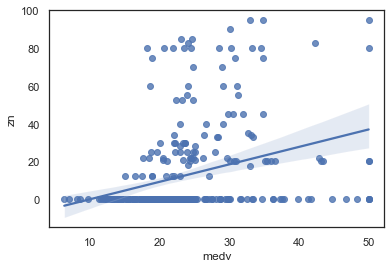

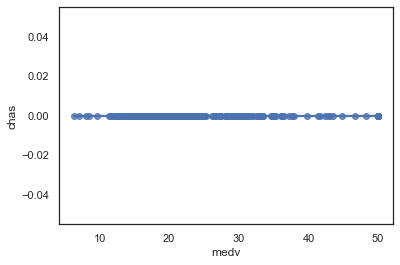

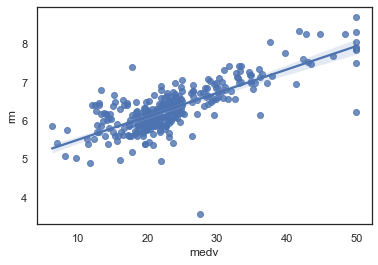

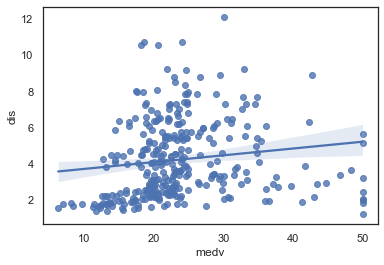

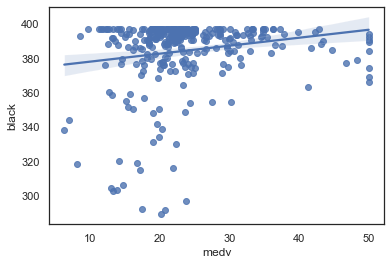

In [120]:
for name in ['zn', 'chas', 'rm', 'dis','black']:
    sns.regplot(x='medv', y=name, data=boston)
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [121]:
# Your response here
"""
I see a positive correlation between rm, dis and the price, which means that if the proce increases then the values of rm and dis increase as well

"""

'\nI see a positive correlation between rm, dis and the price, which means that if the proce increases then the values of rm and dis increase as well\n\n'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

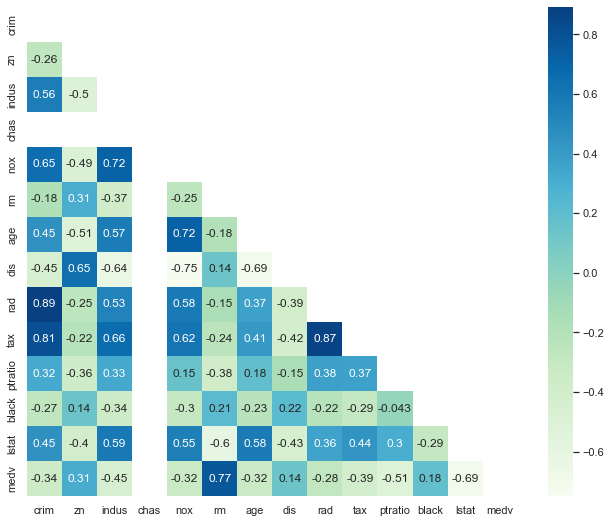

In [122]:
# Your response here
# Your plots here
sns.set_theme(style="white")
corr = boston.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='GnBu', annot=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [124]:
# Your code here
boston['medv'].describe()

count    320.000000
mean      23.633437
std        8.034891
min        6.300000
25%       19.100000
50%       22.200000
75%       26.425000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [125]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # Your code here:
    result = r2_score(y_true, y_predict)
    return result

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [126]:
# Your code here
from sklearn.model_selection import train_test_split


y = boston['medv']
x = boston.drop(labels='medv', axis=1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state = 15)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [128]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

Now, plot the score for each tree on the training set and on the testing set.

In [129]:
# Produce a plot with the score for the testing and training for the different max depths

trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

In [130]:
df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)

<AxesSubplot:>

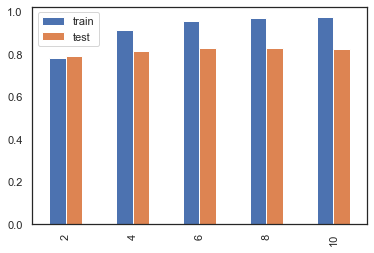

In [131]:
df_score.plot.bar()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [132]:
# Your response here

# The r2 score describes how well the model described the data. the maximum value fo that parameter is 1. It can be observed taht the valeus of r2 score increase with the increase of depth for train. For test this value increases till the depth 6 and then it starts decreasing

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [133]:
# Your response here
from sklearn.metrics import explained_variance_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = explained_variance_score(y_true, y_predict)
    return result

<AxesSubplot:>

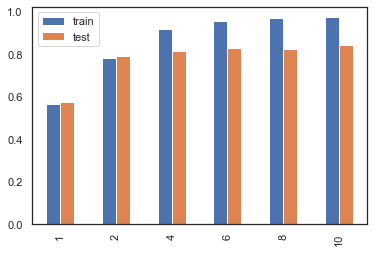

In [134]:
max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)
df_score.plot.bar()

In [135]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = mean_squared_error(y_true, y_predict)
    return result

<AxesSubplot:>

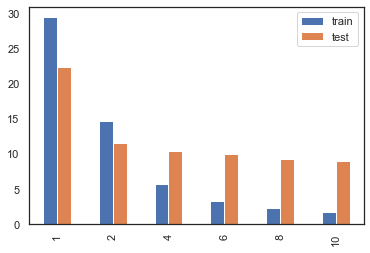

In [136]:
max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
	rfr = RandomForestRegressor(max_depth=num)
	rfr.fit(x_train, y_train)
	key = 'rfr_depth' + str(num)
	y_predictions_train[key]= rfr.predict(x_train)
	y_predictions_test[key]= rfr.predict(x_test)

trains_scores = []
for key in y_predictions_train:
	trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
	test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)
df_score.plot.bar()

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [137]:
# Your response here

# Basing on the garphs above I would say the best max_depth is somewhere in the middle between 1 and 10, maybe closer to 4.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [138]:
# Your response here
'''
Data from almost 50 years ago is not very relevant as a lot of parmetrs changed including market prices of houses. Nevertheless there are some parametres/features that still will influence house prices now, for example number of rooms.
I would assume that with the correct parameters model is robust, but it is applicable only to urban cities. The house prices in rural cities are probably influenced by other factors than prices in urban cities.
'''

'\nData from almost 50 years ago is not very relevant as a lot of parmetrs changed including market prices of houses. Nevertheless there are some parametres/features that still will influence house prices now, for example number of rooms.\nI would assume that with the correct parameters model is robust, but it is applicable only to urban cities. The house prices in rural cities are probably influenced by other factors than prices in urban cities.\n'